**Lets Start**

First we need to prepare our enviroment importing some librarys

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
# Importing DataSet and take a look at Data
df = pd.read_csv('boston_housing.csv')

In [5]:
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [6]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


** Now, or goal is think about the columns, and discovery which columns is relevant to build our model, because if we consider to put columns with not relevant  with our objective "medv" the model may be not efficient **

<Axes: xlabel='rm', ylabel='medv'>

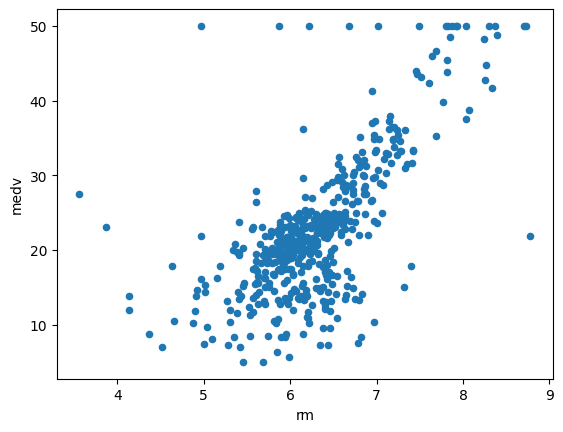

In [8]:
df.plot.scatter('rm', 'medv')

In this plot its clearly to see a linear pattern. Wheter more average number of rooms per dwelling, more expensive the median value is.

** Now lets take a loot how the all variables relate to each other. **

<Axes: >

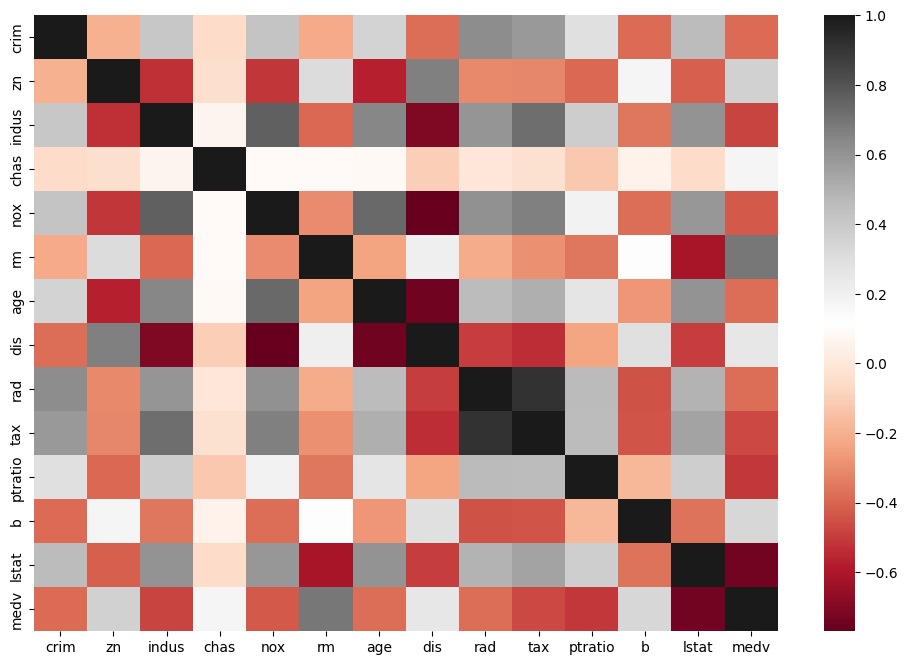

In [9]:
plt.subplots(figsize=(12,8))
sns.heatmap(df.corr(), cmap = 'RdGy')

At this heatmap plot, we can do our analysis better than the pairplot.

Lets focus ate the last line, where y = medv:

When shades of Red/Orange: the more red the color is on X axis, smaller the medv. Negative correlation                           
When light colors: those variables at axis x and y, they dont have any relation. Zero correlation                               
When shades of Gray/Black : the more black the color is on X axis, more higher the value med is. Positive correlation

# Trainning Linear Regression Model
**Define X and Y**

X: Varibles named as predictors, independent variables, features.                                                               
Y: Variable named as response or dependent variable

In [14]:
X = df[['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'b', 'lstat']]
y = df['medv']

**Import sklearn librarys:**    
train_test_split, to split our data in two DF, one for build a model and other to validate.                                     
LinearRegression, to apply the linear regression.

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)

In [17]:
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

In [18]:
predictions = lm.predict(X_test)

Text(0, 0.5, 'Predicted Y')

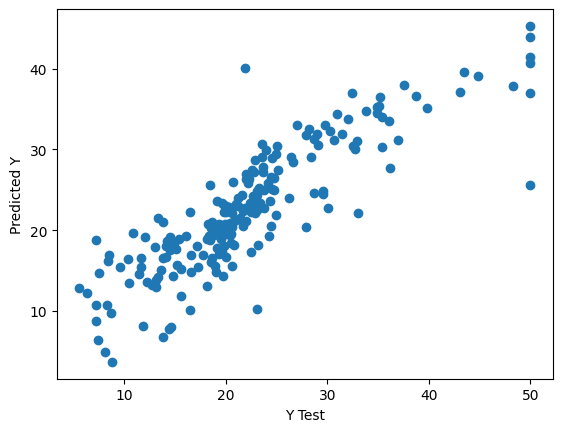

In [19]:
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [20]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 3.412738443458133
MSE: 21.678861326123588
RMSE: 4.6560564135460805


Considering the RMSE: we can conclude that  this model average error is RMSE at medv, which means RMSE *1000  in money

C:\Users\shivp\AppData\Local\Temp\ipykernel_3508\1326397652.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y_test-predictions),bins=50);


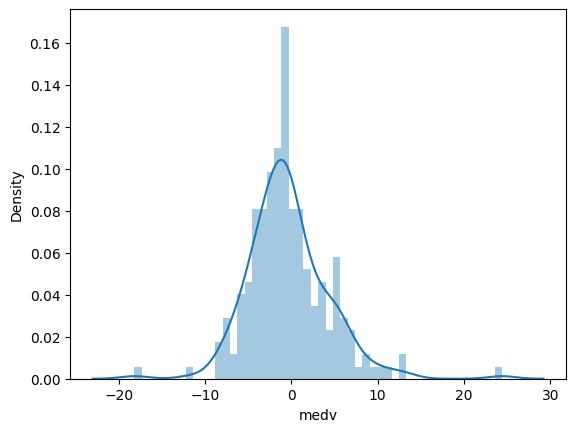

In [21]:
sns.distplot((y_test-predictions),bins=50);

As more normal distribution, better it is.

In [22]:
coefficients = pd.DataFrame(lm.coef_,X.columns)
coefficients.columns = ['coefficients']
coefficients

,coefficients
crim,-0.099680
zn,0.041554
indus,-0.014921
chas,3.349066
nox,-18.086250
rm,4.339780
age,-0.017954
dis,-1.756465
rad,0.257524
tax,-0.007459


How to interpret those coefficients:
    they are in function of Medv, so 
    
    for one unit that nox increase, the house value decrease 'nox'*1000 (Negative correlation) money unit.
    for one unit that rm increase, the house value increase 'rm'*1000 (Positive correlation) money unit.

*1000 because the medv is in 1000
and this apply to the other variables/coefficients.
    